## Result of verification set

### Import package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from core.core import *

### Identification of known targets

In [2]:
# define known target
drug_targets = {'Palbociclib': ['CDK4', 'CDK6'], 
                'Panobinostat': ['HDAC1', 'HDAC2'],
                'Fimepinostat': ['HDAC1', 'HDAC2'],
                'Raltitrexed': ['TYMS'], 
                'Methotrexate': ['DHFR'], 
                'Vemurafenib': ['BRAF'],
                'SCIO-469': ['MAPK14'],
                'SL-327': ['MAP2K1', 'MAP2K2'],
                'Olaparib': ['PARP1']}

In [3]:
drugs = ['Palbociclib', 'Panobinostat', 'Fimepinostat', 'Raltitrexed', 
         'Methotrexate', 'Vemurafenib', 'SCIO-469', 'SL-327', 'Olaparib']

targets = ['CDK4', 'CDK6', 'HDAC1', 'HDAC2', 'TYMS', 'DHFR', 
          'BRAF', 'MAPK14', 'MAP2K1', 'MAP2K2', 'PARP1']

def plat_target_ranking(scores, drug_targets):
    plt_data = []
    for drug in drugs:
        for t in targets:
            w = np.where(scores['Gene Symbol'] == t)[0][0]
            if drug not in scores.columns:
                rank = np.nan
                mark = str('not included')
                plt_data.append([drug, t, rank, mark])
                continue
            score = scores[drug][w]
            rank = len(np.where(scores[drug] >= score)[0])
            if rank > 25:
                mark = 'rank > 25'
                ss = 50
            elif rank > 10:
                mark = '10 > rank >= 25'
                ss = 150
            elif rank > 5:
                mark = '5 > rank >= 10'
                ss = 250
            elif rank > 1:
                mark = '1 > rank >= 5'
                ss = 350
            else:
                mark = 'rank = 1'
                ss = 350
            plt_data.append([drug, t, rank, mark, ss])
    plt_data = pd.DataFrame(plt_data)
    plt_data.columns = ['drug', 'target', 'rank', 'mark', 'size']
    print(plt_data)
    
    flatui = ['red', 'pink', 'orange', 'purple', 'navy']
    hue_order = ['rank = 1', '1 > rank >= 5', '5 > rank >= 10', '10 > rank >= 25', 'rank > 25']
    my_cmap = ListedColormap(sns.color_palette(flatui).as_hex())

    plt.figure(dpi = 300, figsize = (12, 4))
    sns.scatterplot(x='drug', y='target', hue='mark', data=plt_data, size='size', palette = my_cmap.colors,
                    hue_order = hue_order, legend = False, sizes=(20, 250))
    plt.xticks(fontsize = 18, ticks = np.arange(len(drugs)), labels = ['Palb', 'Panob', 'Fimep', 'Ralti', 'Metho', 'Vemur', 'S-469', 'SL-327', 'Olapa'])
    plt.yticks(fontsize = 18)
    plt.xlabel('')
    plt.ylabel('')
    # plt.legend(loc='upper right', bbox_to_anchor=(1.39, 1), fontsize = 20, markerscale = 2)

### K562

In [4]:
# load the processed result
scores = pd.read_csv('results/PL_K562_F_scores.csv')
fold_changes = pd.read_csv('results/PL_K562_F_fold_changes.csv')

           drug  target  rank             mark  size
0   Palbociclib    CDK4    93        rank > 25    50
1   Palbociclib    CDK6    12  10 > rank >= 25   150
2   Palbociclib   HDAC1  3784        rank > 25    50
3   Palbociclib   HDAC2  3784        rank > 25    50
4   Palbociclib    TYMS   639        rank > 25    50
..          ...     ...   ...              ...   ...
94     Olaparib    BRAF  3784        rank > 25    50
95     Olaparib  MAPK14  3784        rank > 25    50
96     Olaparib  MAP2K1  3784        rank > 25    50
97     Olaparib  MAP2K2  3784        rank > 25    50
98     Olaparib   PARP1    20  10 > rank >= 25   150

[99 rows x 5 columns]


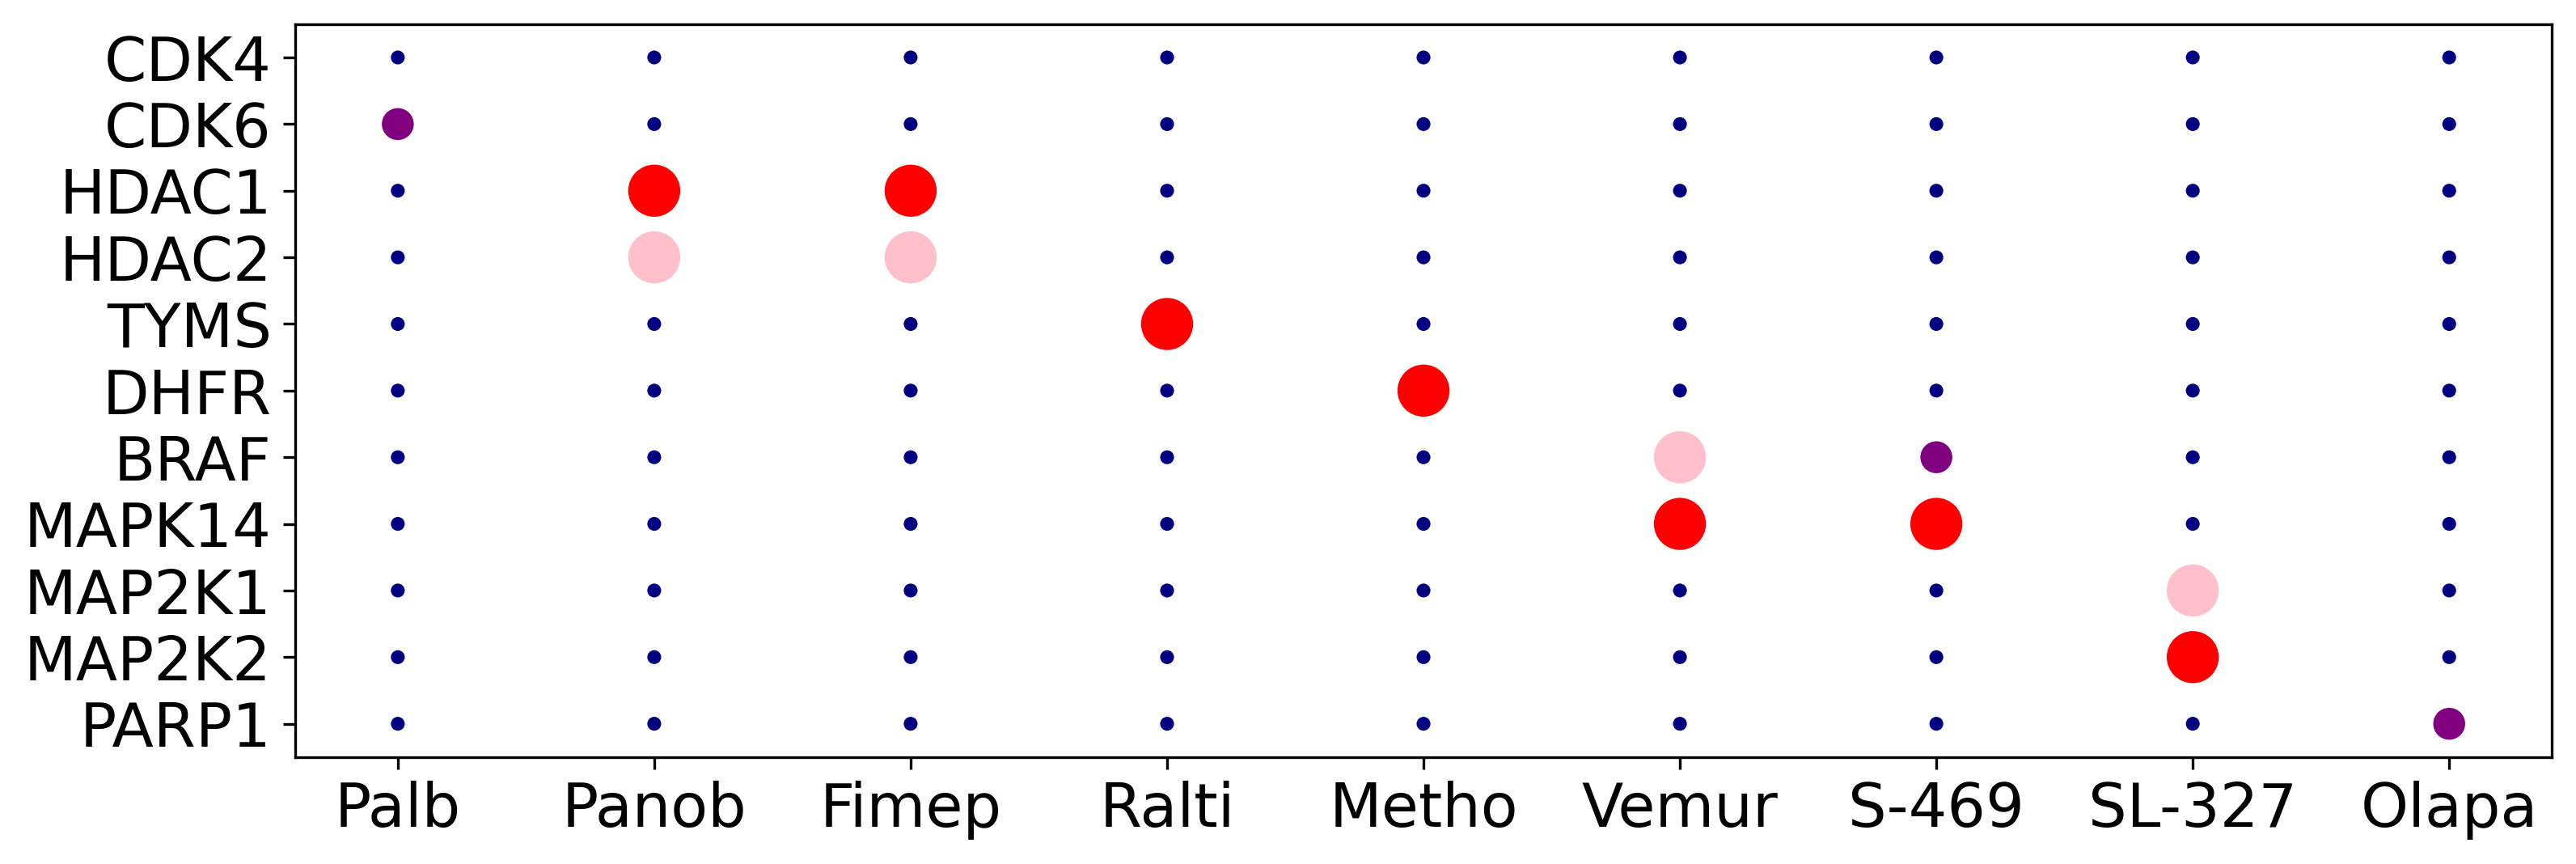

In [5]:
# plot ranking of true targets
plat_target_ranking(scores, drug_targets)

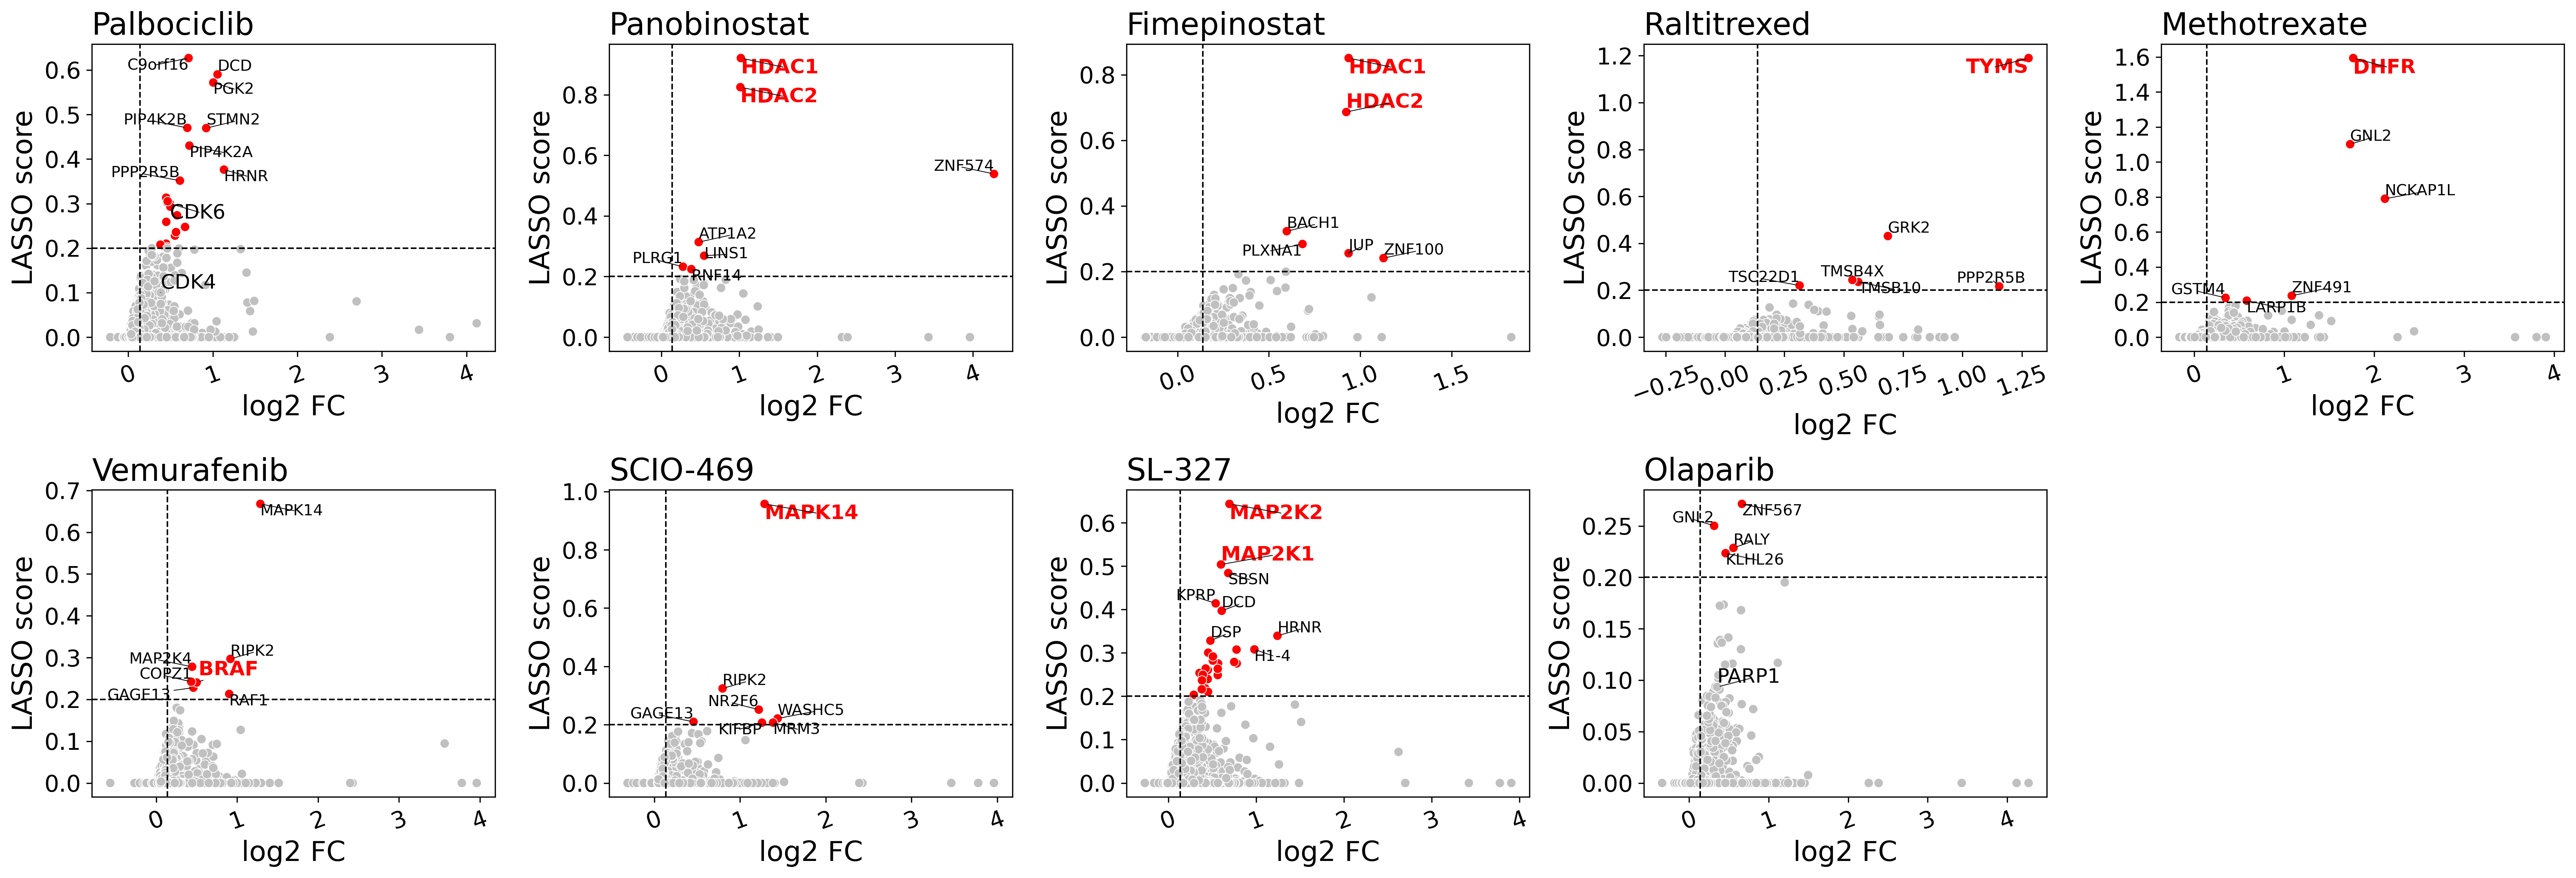

In [6]:
# plot the result
i = 1
plt.figure(dpi = 300, figsize = (23.3, 8))
for d, genes in drug_targets.items():
    plt.subplot(2,5,i)
    plot_results(d, scores, fold_changes, genes, fc_thres = 1.1, score_thres=0.2, top_markers = 8)
    i += 1
plt.tight_layout()

### 293T

In [7]:
# load the processed result
scores = pd.read_csv('results/PL_293T_F_scores.csv')
fold_changes = pd.read_csv('results/PL_293T_F_fold_changes.csv')

           drug  target  rank           mark  size
0   Palbociclib    CDK4  4132      rank > 25    50
1   Palbociclib    CDK6  4132      rank > 25    50
2   Palbociclib   HDAC1  4132      rank > 25    50
3   Palbociclib   HDAC2  4132      rank > 25    50
4   Palbociclib    TYMS  4132      rank > 25    50
..          ...     ...   ...            ...   ...
94     Olaparib    BRAF  4132      rank > 25    50
95     Olaparib  MAPK14  4132      rank > 25    50
96     Olaparib  MAP2K1  4132      rank > 25    50
97     Olaparib  MAP2K2  4132      rank > 25    50
98     Olaparib   PARP1     2  1 > rank >= 5   350

[99 rows x 5 columns]


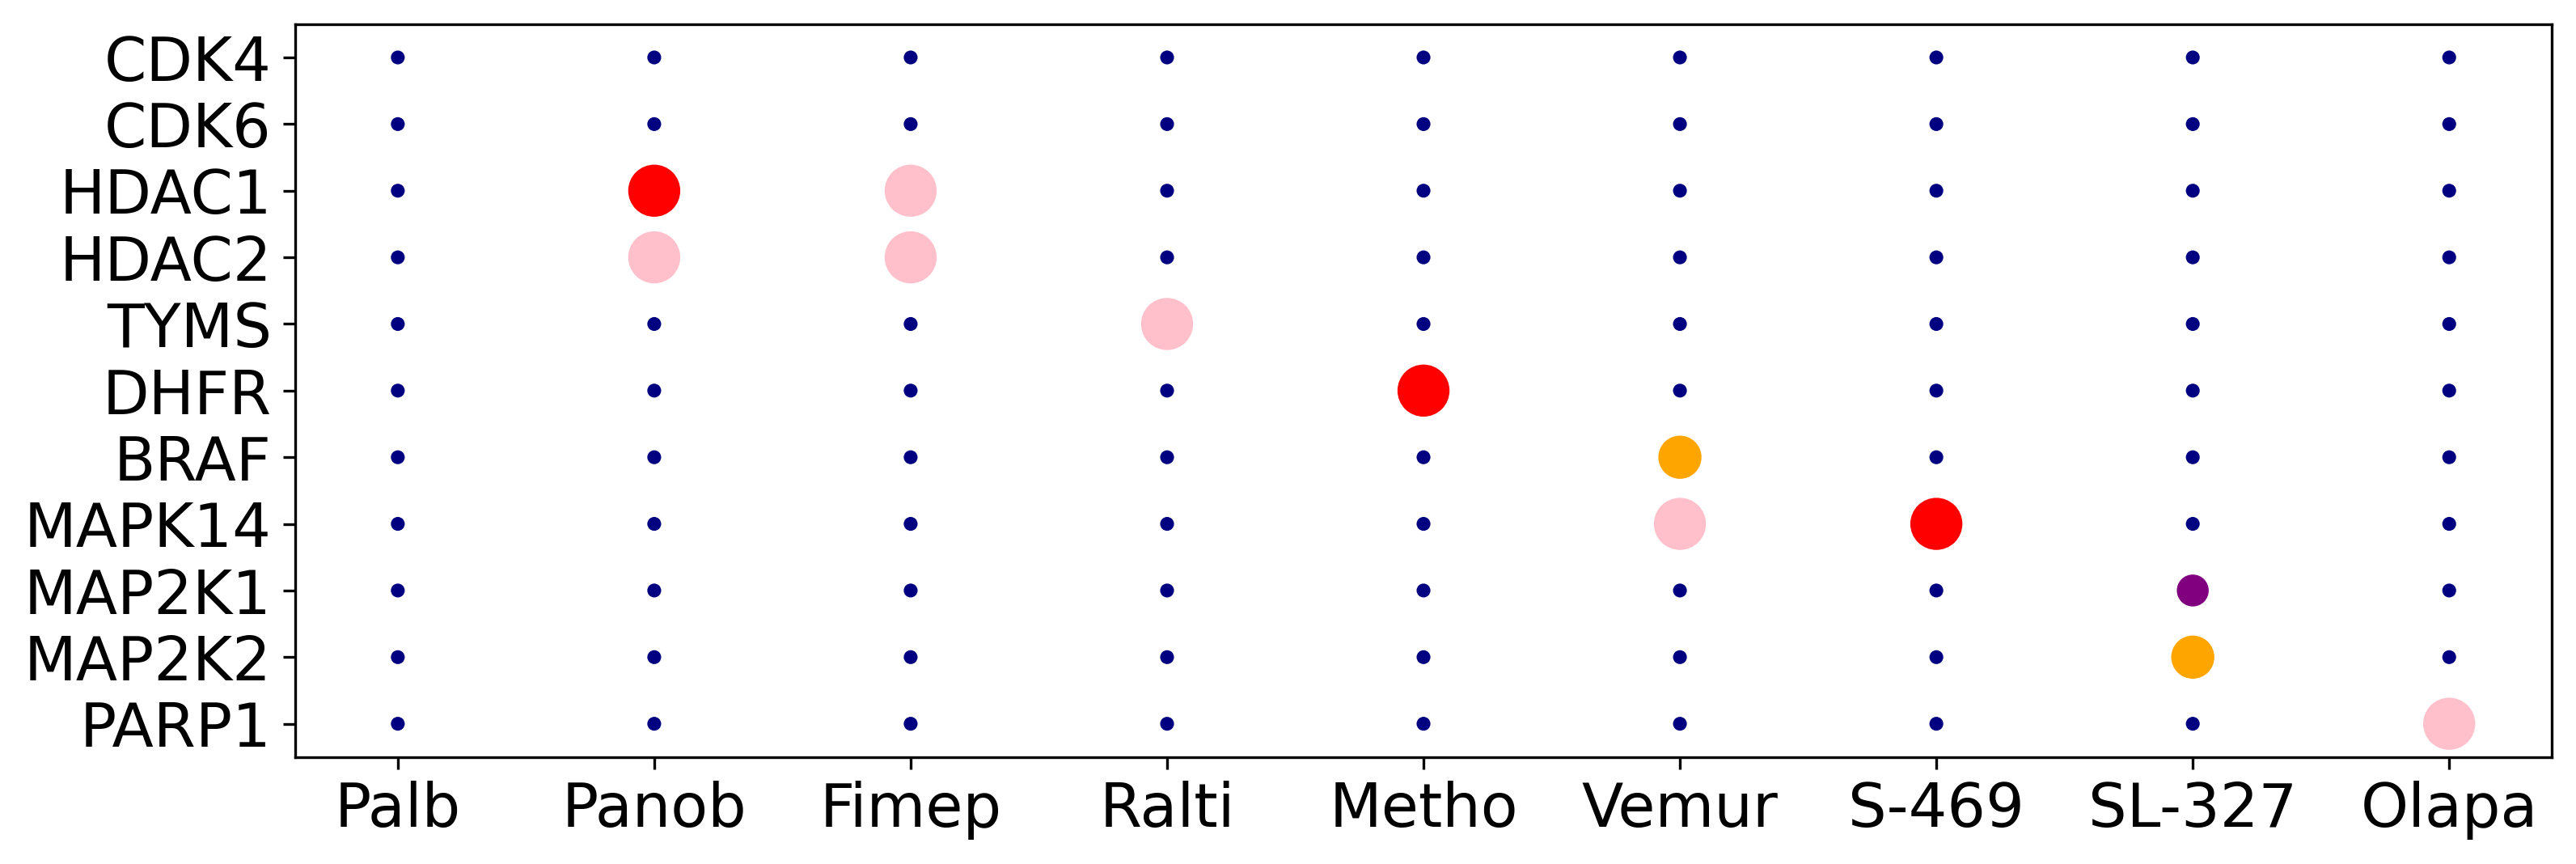

In [8]:
# plot ranking of true targets
plat_target_ranking(scores, drug_targets)

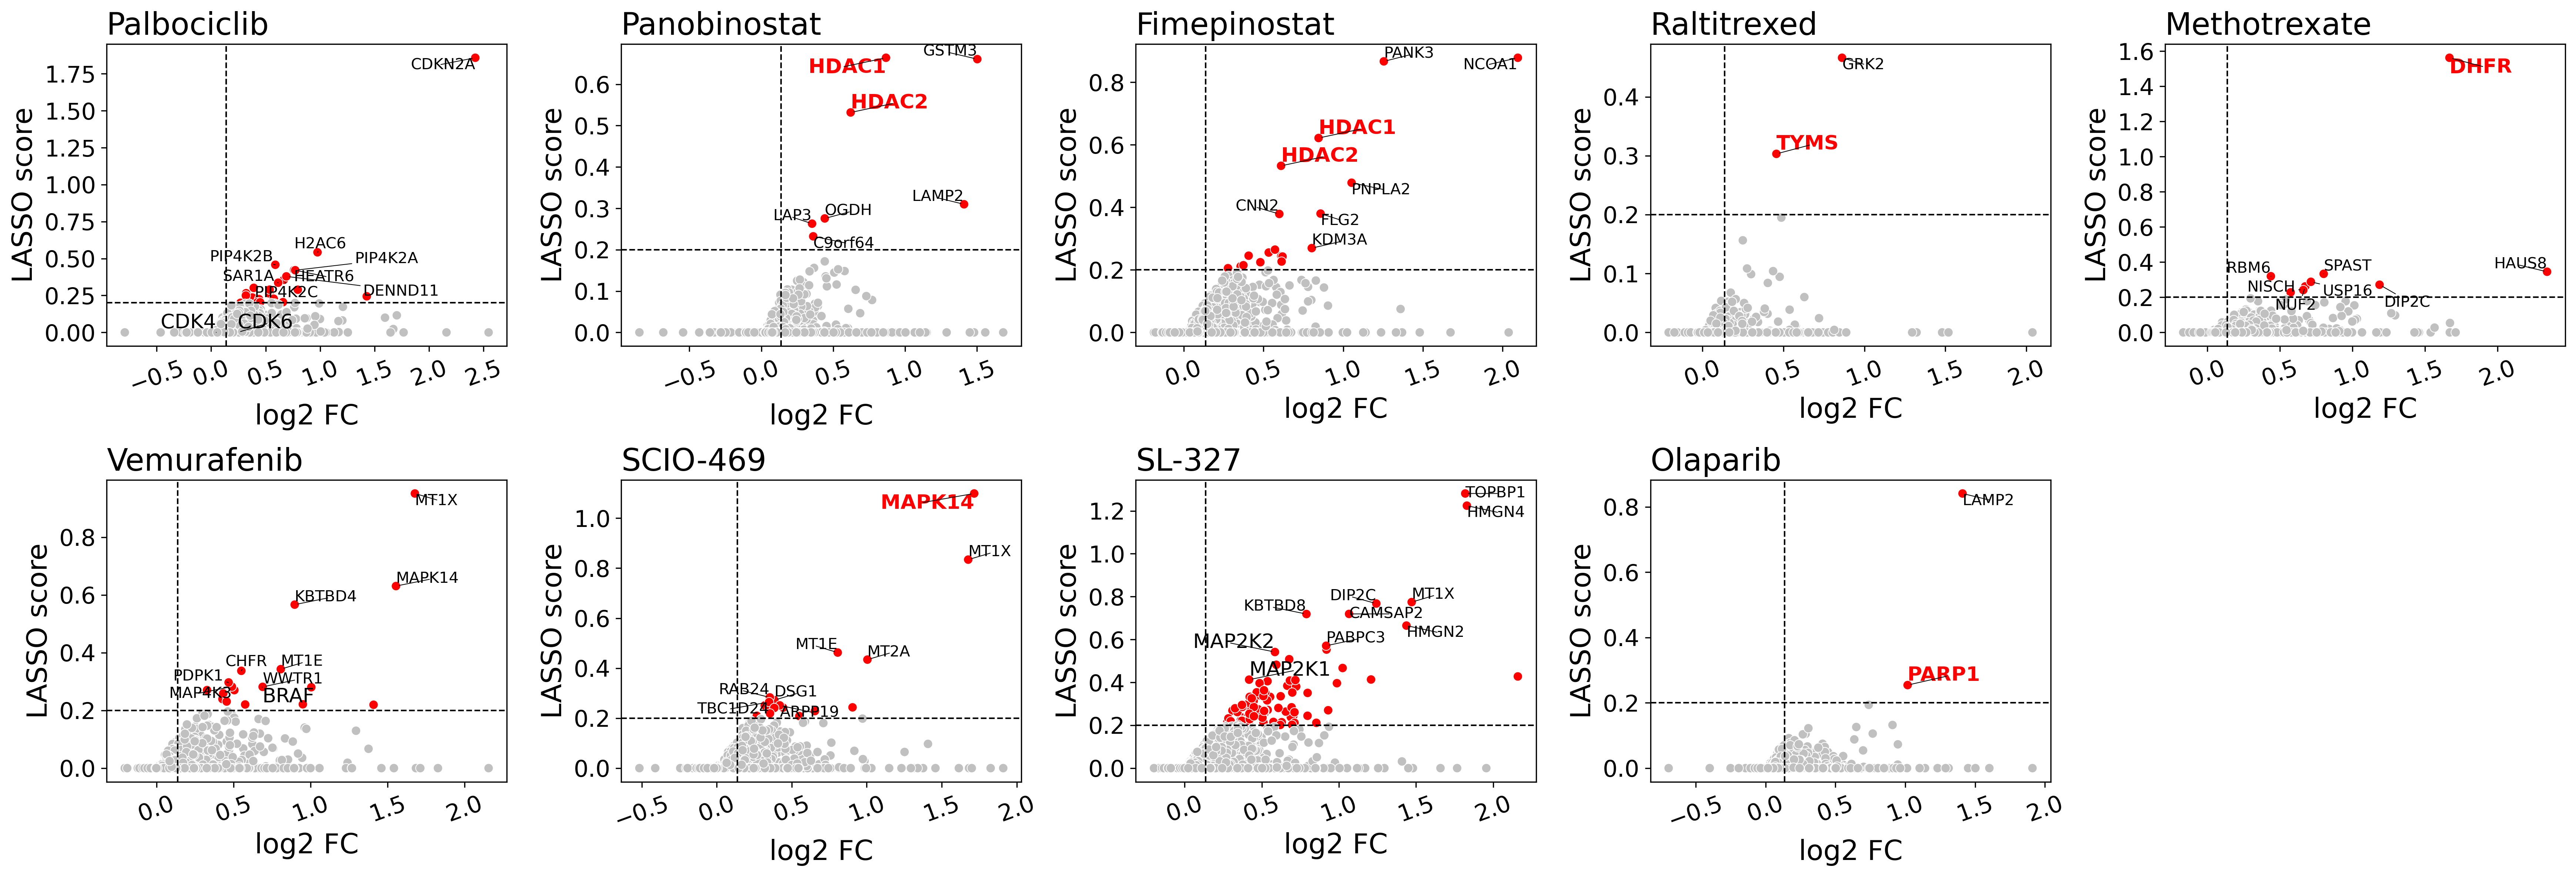

In [9]:
# plot the result
i = 1
plt.figure(dpi = 300, figsize = (23.3, 8))
for d, genes in drug_targets.items():
    plt.subplot(2,5,i)
    plot_results(d, scores, fold_changes, genes, fc_thres = 1.1, score_thres=0.2, top_markers = 8)
    i += 1
plt.tight_layout()

### HepG2

In [10]:
# load the processed result
scores = pd.read_csv('results/PL_HepG2_F_scores.csv')
fold_changes = pd.read_csv('results/PL_HepG2_F_fold_changes.csv')

           drug  target  rank             mark  size
0   Palbociclib    CDK4  4013        rank > 25    50
1   Palbociclib    CDK6    23  10 > rank >= 25   150
2   Palbociclib   HDAC1  4013        rank > 25    50
3   Palbociclib   HDAC2  4013        rank > 25    50
4   Palbociclib    TYMS  4013        rank > 25    50
..          ...     ...   ...              ...   ...
94     Olaparib    BRAF  4013        rank > 25    50
95     Olaparib  MAPK14  4013        rank > 25    50
96     Olaparib  MAP2K1  4013        rank > 25    50
97     Olaparib  MAP2K2  4013        rank > 25    50
98     Olaparib   PARP1     1         rank = 1   350

[99 rows x 5 columns]


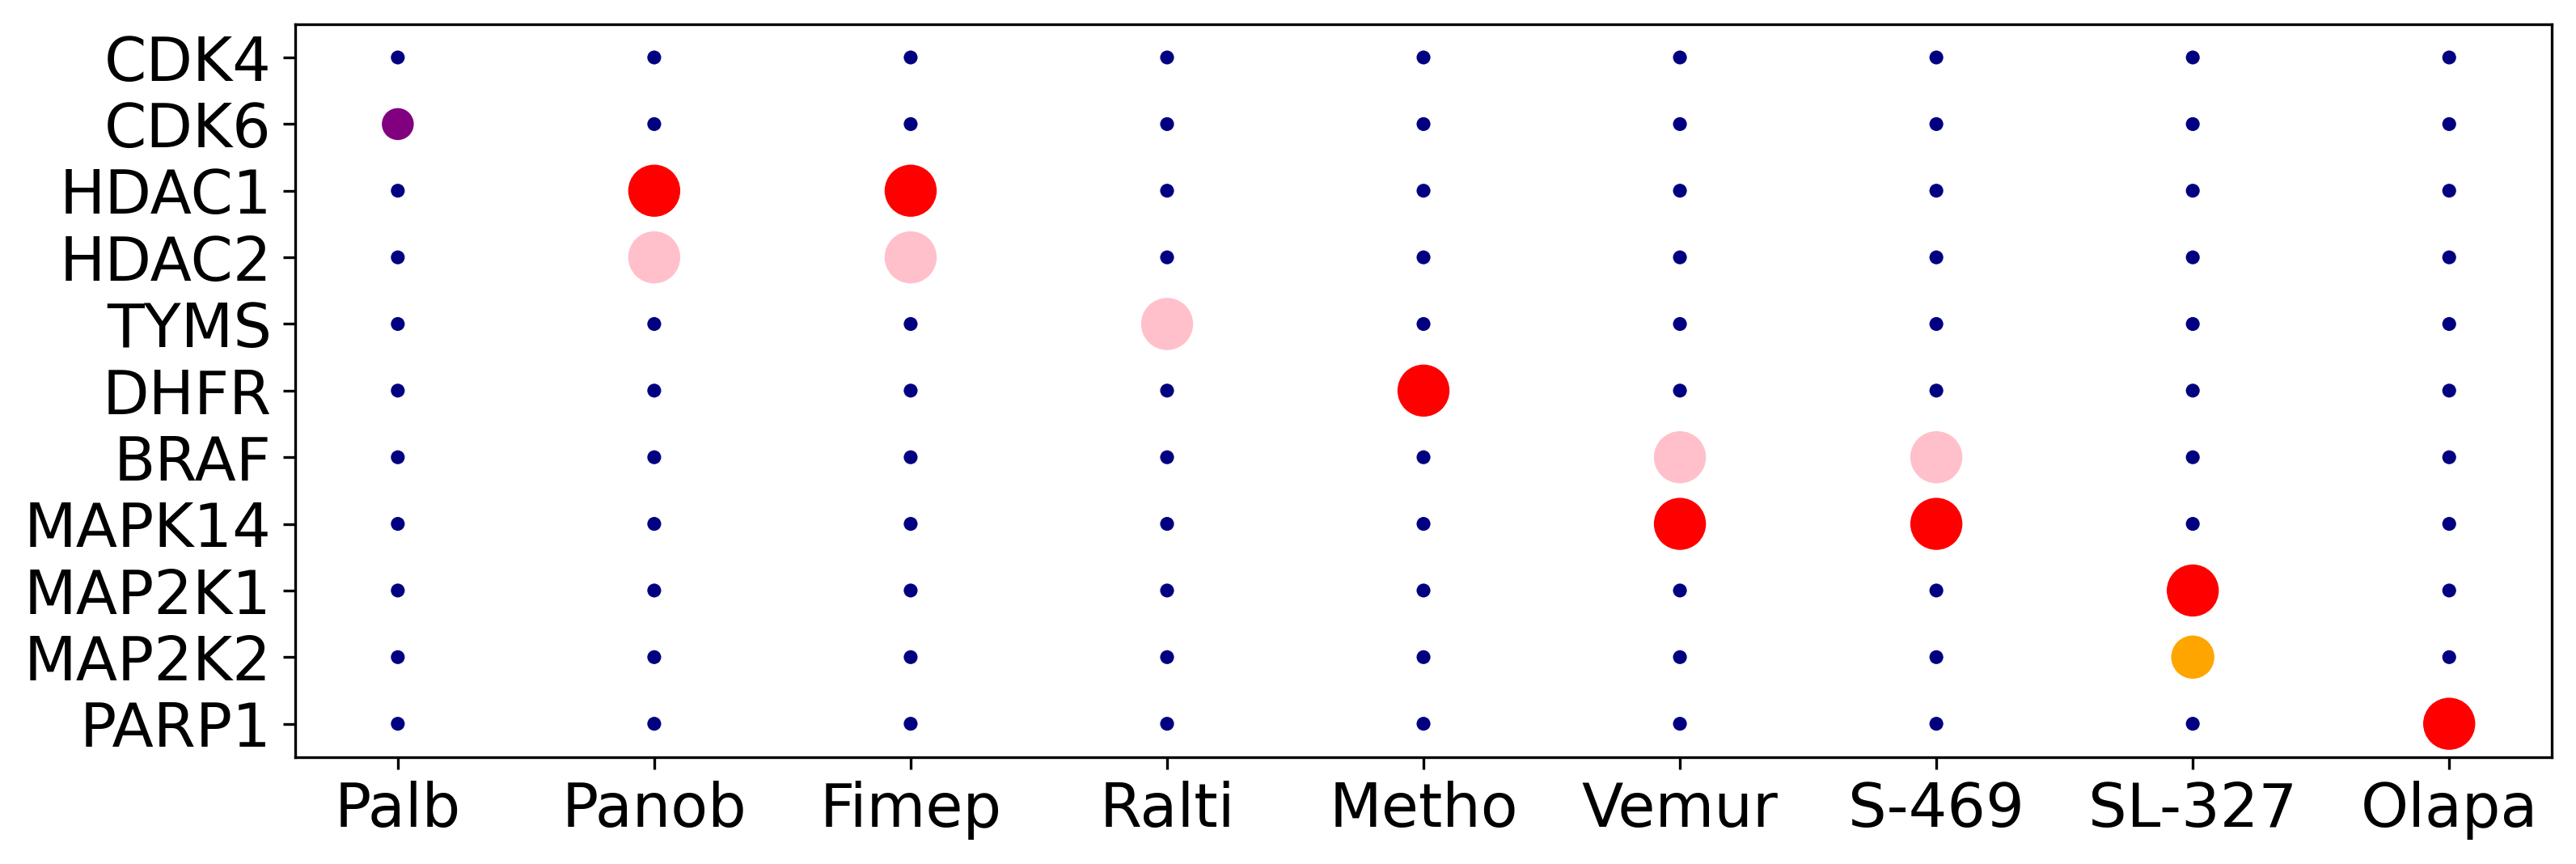

In [11]:
# plot ranking of true targets
plat_target_ranking(scores, drug_targets)

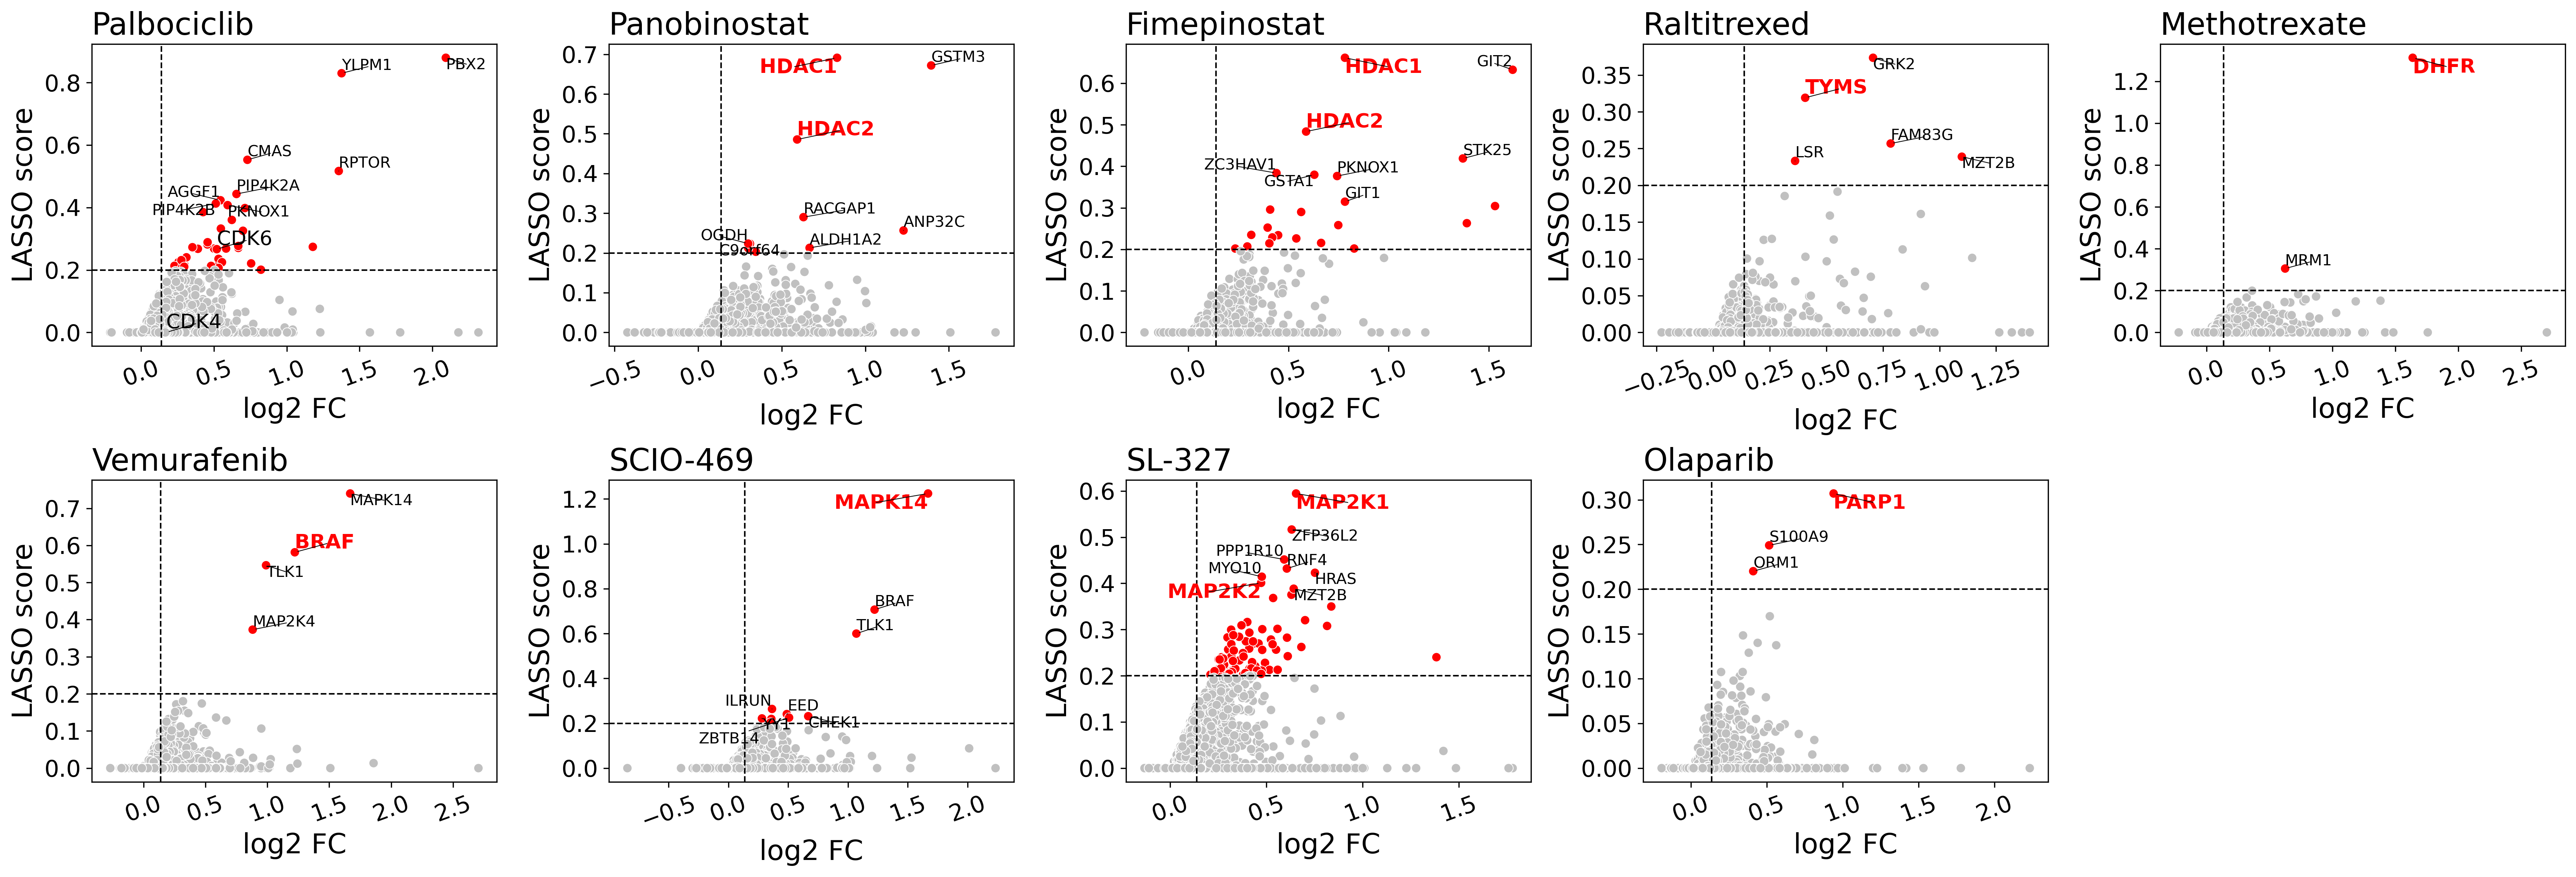

In [12]:
i = 1
plt.figure(dpi = 300, figsize = (23.3, 8))
for d, genes in drug_targets.items():
    plt.subplot(2,5,i)
    plot_results(d, scores, fold_changes, genes, fc_thres = 1.1, score_thres=0.2, top_markers = 8)
    i += 1
plt.tight_layout()

### HCT116

In [13]:
# load the processed result
scores = pd.read_csv('results/PL_HCT116_F_scores.csv')
fold_changes = pd.read_csv('results/PL_HCT116_F_fold_changes.csv')

           drug  target  rank             mark  size
0   Palbociclib    CDK4   342        rank > 25    50
1   Palbociclib    CDK6    34        rank > 25    50
2   Palbociclib   HDAC1  3668        rank > 25    50
3   Palbociclib   HDAC2  3668        rank > 25    50
4   Palbociclib    TYMS  3668        rank > 25    50
..          ...     ...   ...              ...   ...
94     Olaparib    BRAF  3668        rank > 25    50
95     Olaparib  MAPK14  3668        rank > 25    50
96     Olaparib  MAP2K1  3668        rank > 25    50
97     Olaparib  MAP2K2  3668        rank > 25    50
98     Olaparib   PARP1    21  10 > rank >= 25   150

[99 rows x 5 columns]


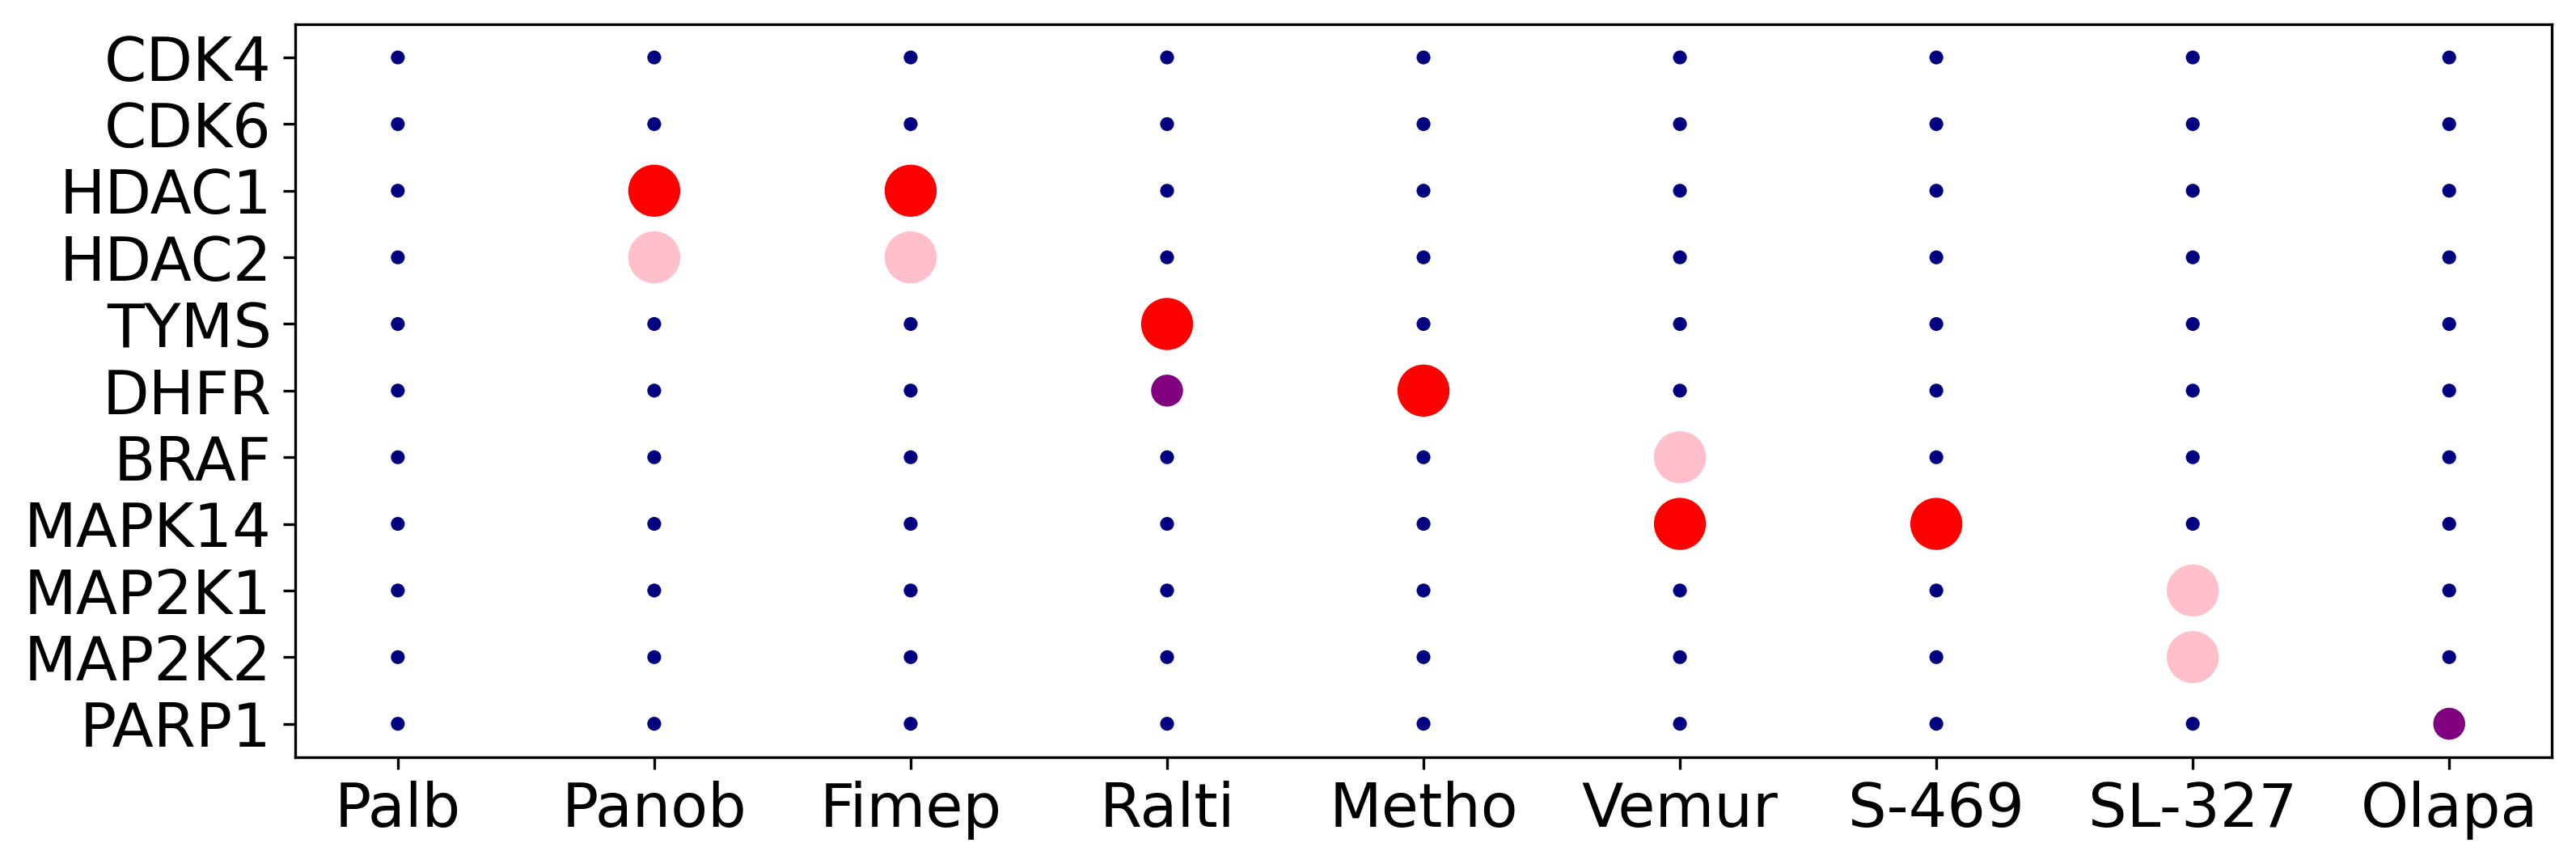

In [14]:
# plot ranking of true targets
plat_target_ranking(scores, drug_targets)

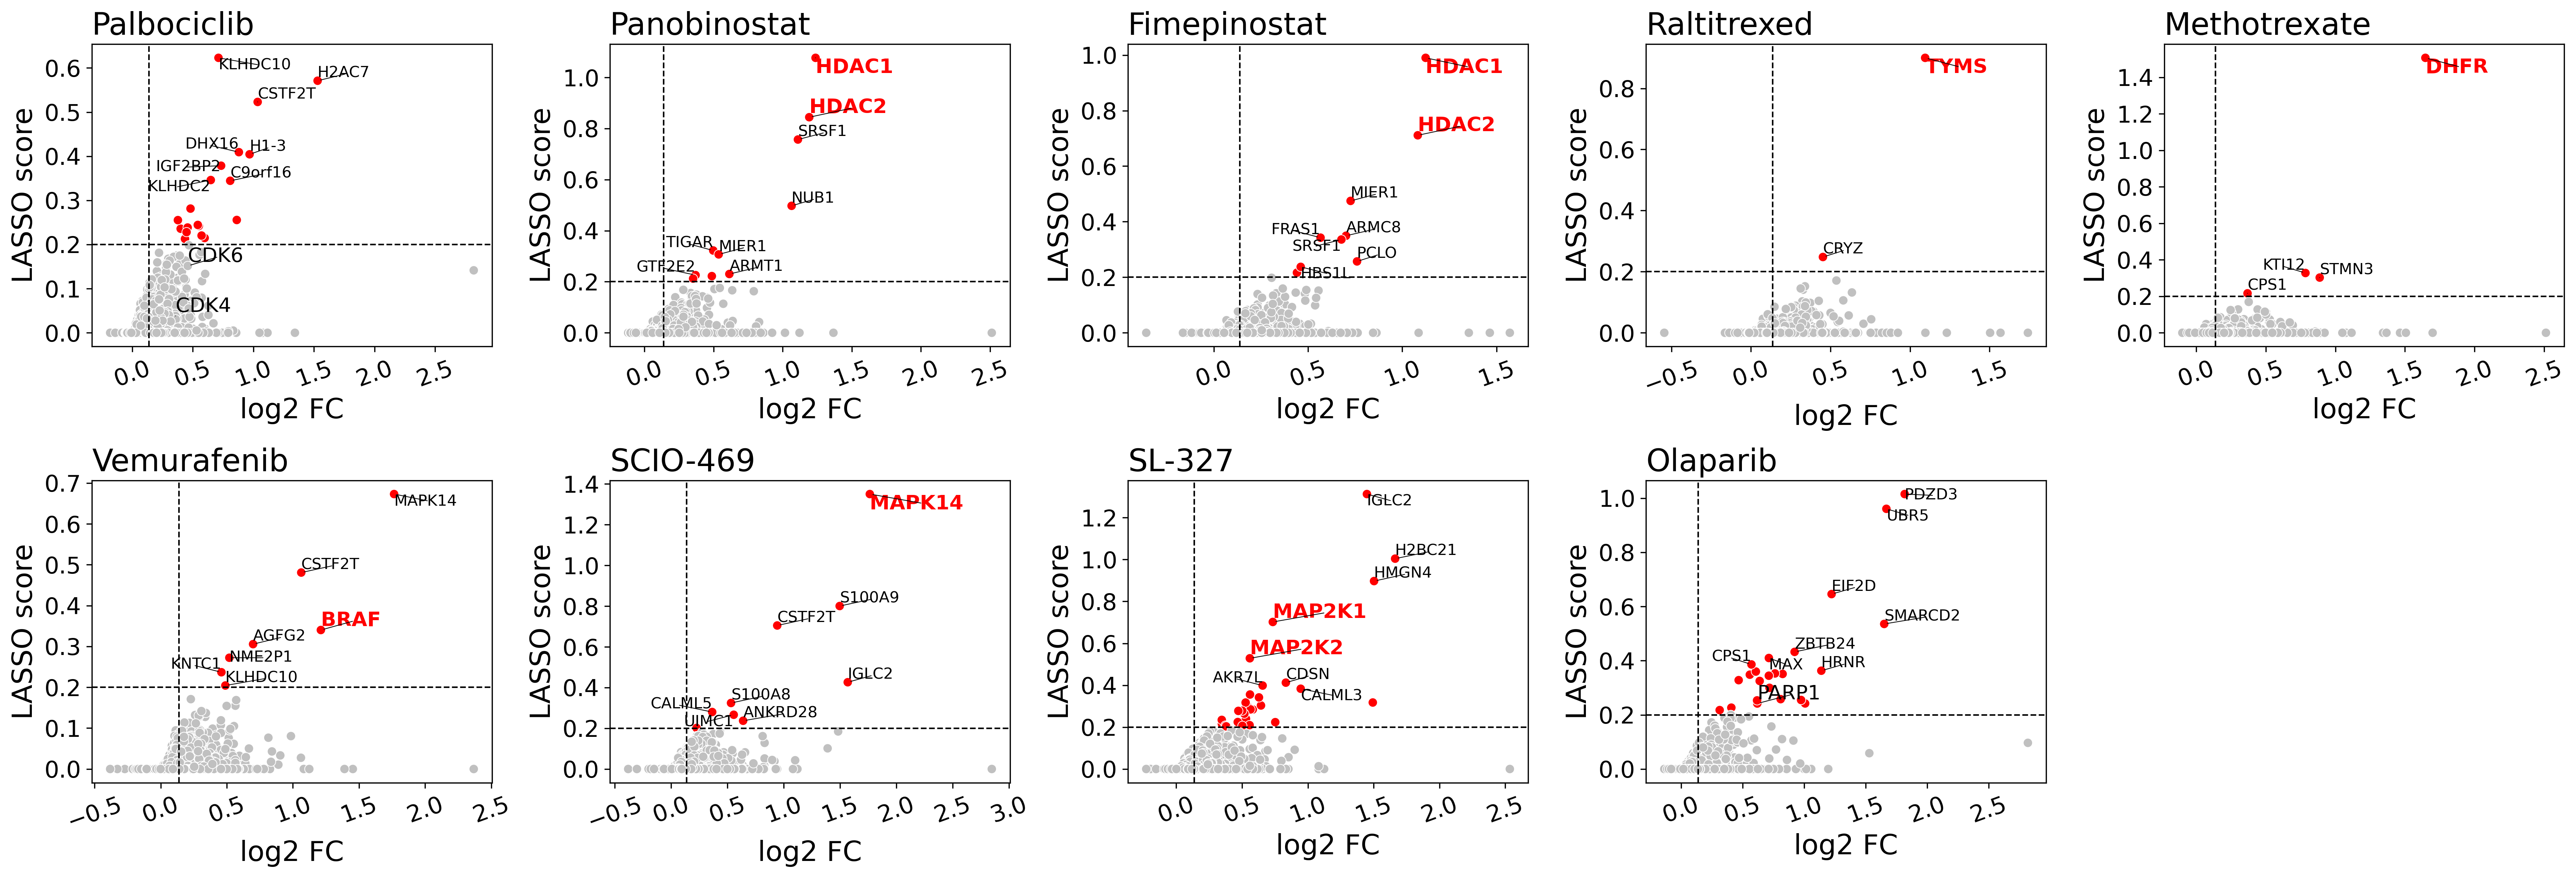

In [15]:
# plot the result
i = 1
plt.figure(dpi = 300, figsize = (23.3, 8))
for d, genes in drug_targets.items():
    plt.subplot(2,5,i)
    plot_results(d, scores, fold_changes, genes, fc_thres = 1.1, score_thres=0.2, top_markers = 8)
    i += 1
plt.tight_layout()

### MCF7

In [16]:
# load the processed result
scores = pd.read_csv('results/PL_MCF7_F_scores.csv')
fold_changes = pd.read_csv('results/PL_MCF7_F_fold_changes.csv')

           drug  target  rank           mark  size
0   Palbociclib    CDK4   698      rank > 25    50
1   Palbociclib    CDK6   347      rank > 25    50
2   Palbociclib   HDAC1  3963      rank > 25    50
3   Palbociclib   HDAC2  3963      rank > 25    50
4   Palbociclib    TYMS  3963      rank > 25    50
..          ...     ...   ...            ...   ...
94     Olaparib    BRAF  3963      rank > 25    50
95     Olaparib  MAPK14  3963      rank > 25    50
96     Olaparib  MAP2K1  3963      rank > 25    50
97     Olaparib  MAP2K2  3963      rank > 25    50
98     Olaparib   PARP1     2  1 > rank >= 5   350

[99 rows x 5 columns]


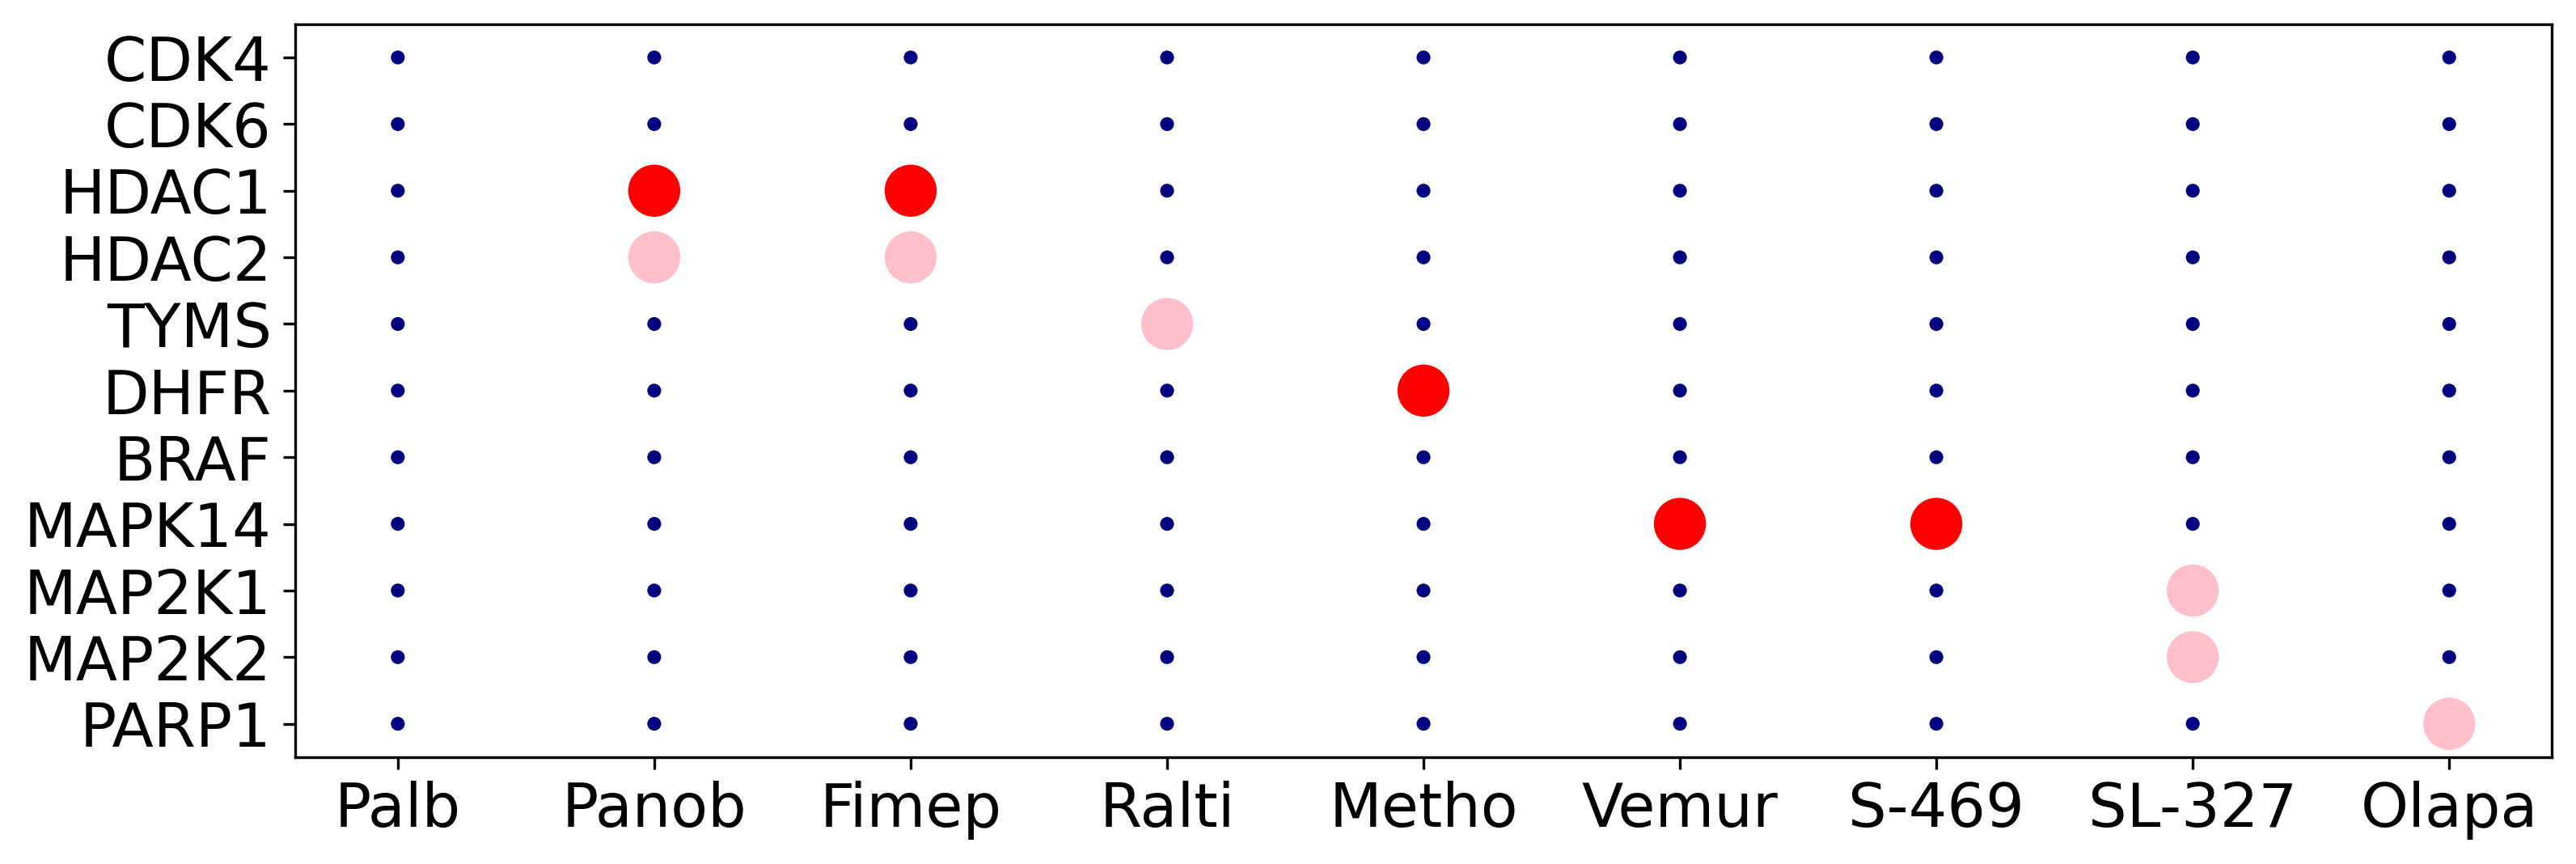

In [17]:
# plot ranking of true targets
plat_target_ranking(scores, drug_targets)

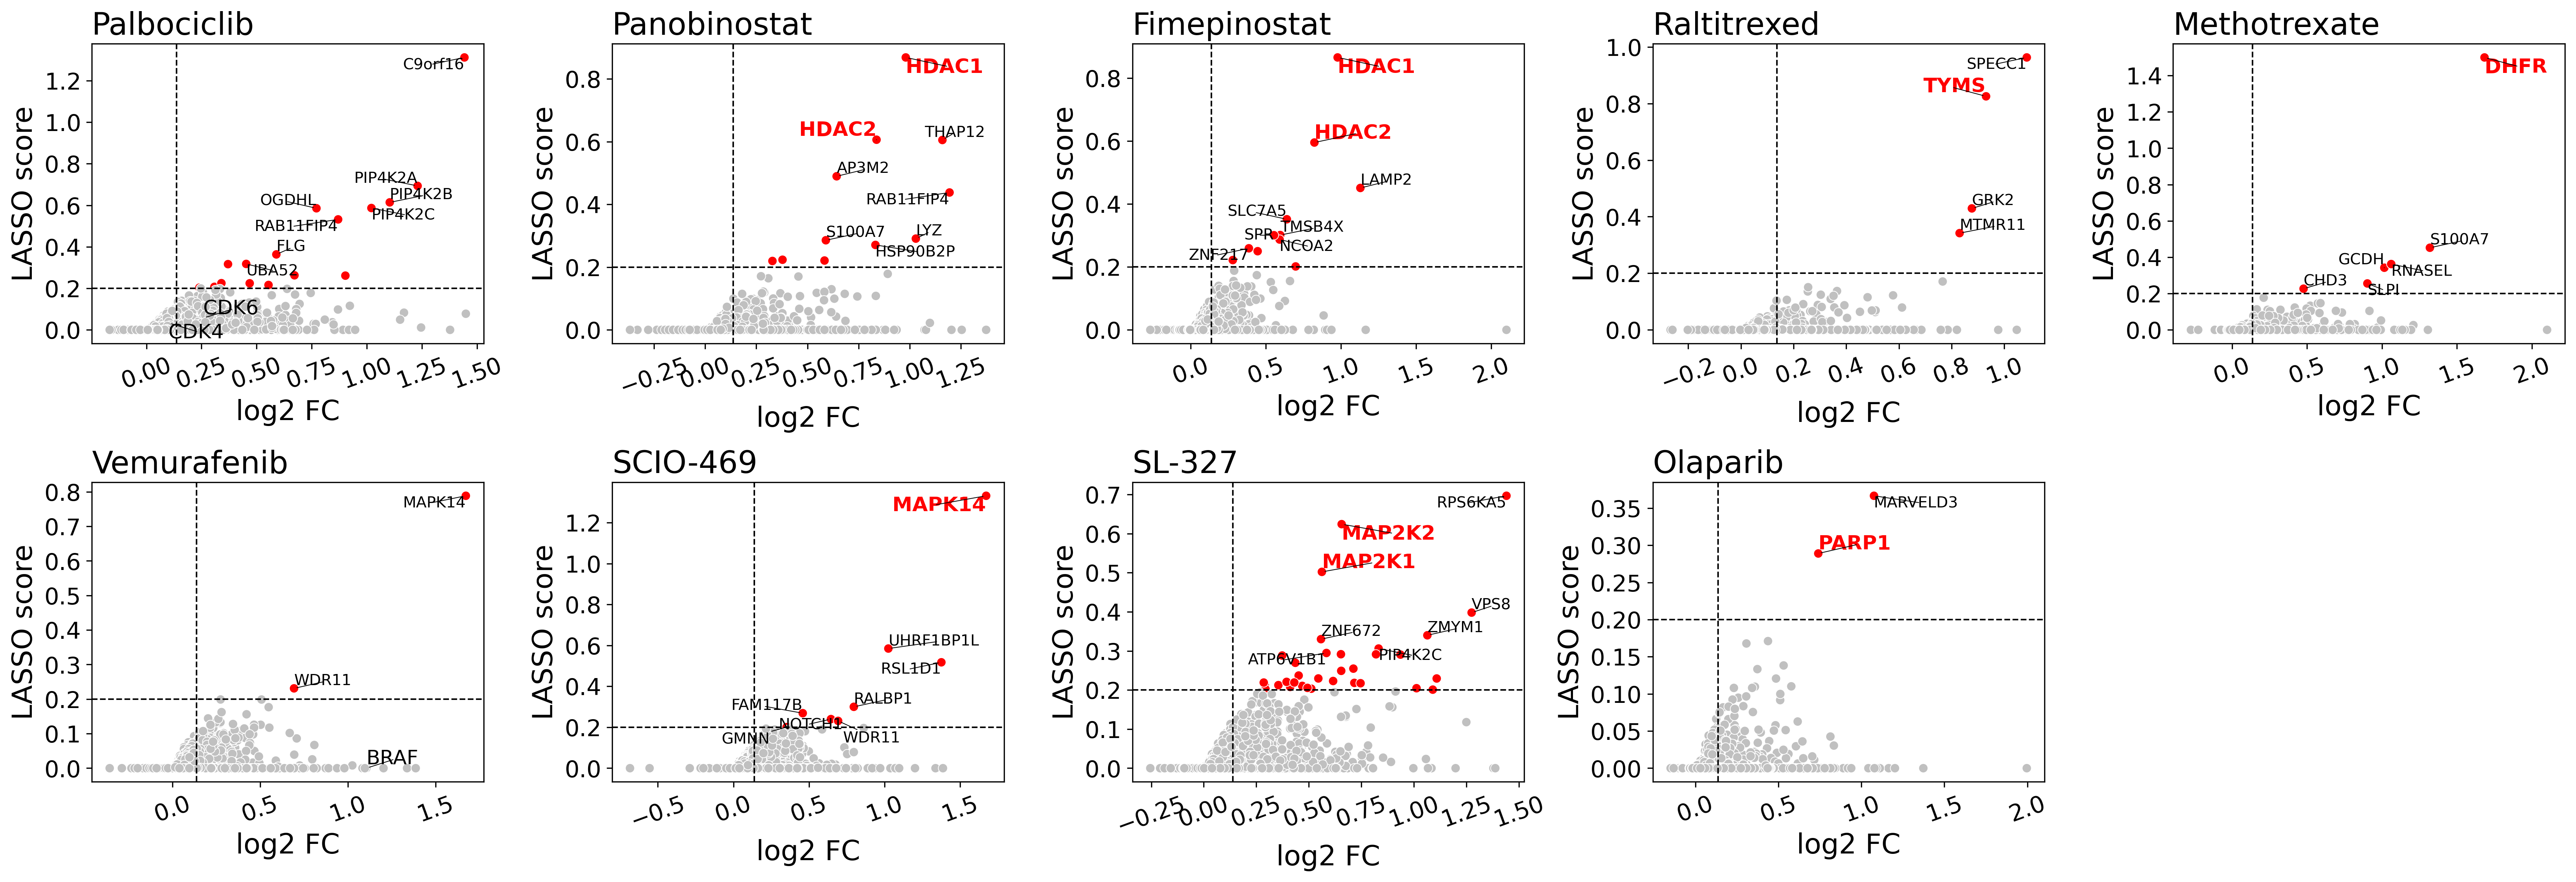

In [18]:
# plot the result
i = 1
plt.figure(dpi = 300, figsize = (23.3, 8))
for d, genes in drug_targets.items():
    plt.subplot(2,5,i)
    plot_results(d, scores, fold_changes, genes, fc_thres = 1.1, score_thres=0.2, top_markers = 8)
    i += 1
plt.tight_layout()